In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import warnings
from scipy.optimize import curve_fit

plt.rc("font", family=["Helvetica", "Arial"]) # skifter skrifttype
plt.rc("axes", labelsize=22)   # skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
def gaussian(x, amplitude, mean, standard_deviation, b):
    return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2)) + b

def loadDeltaZ(filenames):
    allDeltaZ = np.array([])
    minDeltaZ = []
    for filename in filenames:
        with open(filename) as file:
            for line in file:
                deltaZs = np.array([float(x) for x in line.split()])
                if(len(deltaZs) > 0):
                    allDeltaZ = np.concatenate((allDeltaZ, deltaZs))
                    minIdx = np.argmin(np.abs(deltaZs))
                    minDeltaZ.append(deltaZs[minIdx])
    return np.array(minDeltaZ), allDeltaZ

In [3]:
AMVF_filenames =         np.sort(glob.glob('ntuple_check_AMVFmaxiter100/AMVFresolution/*.txt'))
AMVF_vs_reco_filenames = np.sort(glob.glob('ntuple_check_AMVFmaxiter100/AMVFvsRecoResolution/*.txt'))
IVF_filenames =          np.sort(glob.glob('ntuple_check_AMVFmaxiter100/IVFresolution/*.txt'))

In [4]:
AMVF_min_delta_z, AMVF_delta_z = loadDeltaZ(AMVF_filenames)
IVF_min_delta_z, IVF_delta_z = loadDeltaZ(IVF_filenames)
AMVF_vs_reco_min_delta_z, AMVF_vs_reco_delta_z = loadDeltaZ(AMVF_vs_reco_filenames)

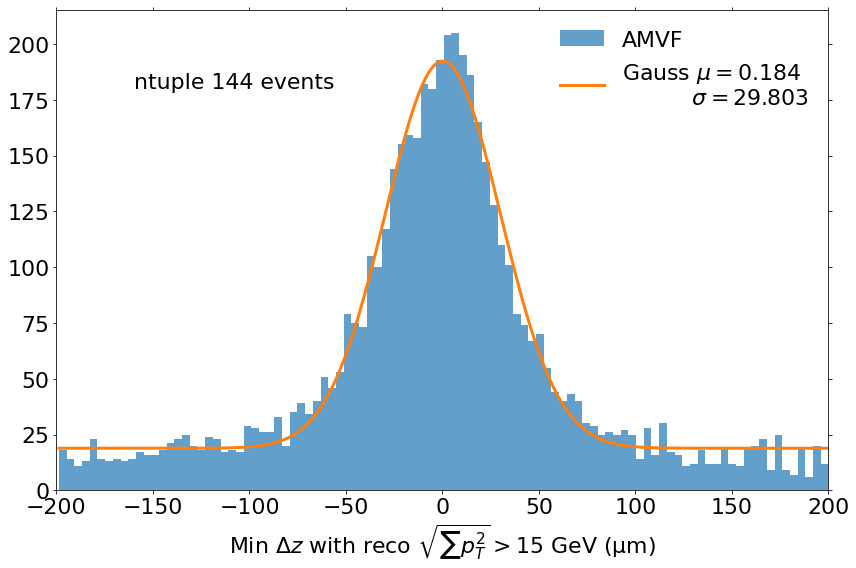

In [10]:
max_delta_z = 200

IVF_idx  = np.abs(1e3*IVF_min_delta_z) < max_delta_z 
AMVF_idx = np.abs(1e3*AMVF_min_delta_z) < max_delta_z

# IVFbin_heights, IVFbin_borders, _ =   plt.hist(1e3*IVF_min_delta_z [IVF_idx],  bins=100, alpha=0.7, label='IVF')
AMVFbin_heights, AMVFbin_borders, _ = plt.hist(1e3*AMVF_min_delta_z[AMVF_idx], bins=100, alpha=0.7, label='AMVF')

# IVFbin_centers = IVFbin_borders[:-1] + np.diff(IVFbin_borders) / 2
# popt1, _ = curve_fit(gaussian, IVFbin_centers, IVFbin_heights, p0=[100, 0., 100, 0])

# #Plot fit
# x_interval_for_fit = np.linspace(IVFbin_borders[0], IVFbin_borders[-1], 10000)
# plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt1), lw=3, label='Gauss $\\mu={:.3f}$\n          $\\sigma={:.3f}$'.format(popt1[1], popt1[2]))

AMVFbin_centers = AMVFbin_borders[:-1] + np.diff(AMVFbin_borders) / 2
popt1, _ = curve_fit(gaussian, AMVFbin_centers, AMVFbin_heights, p0=[100, 0., 30, 0])

#Plot fit
x_interval_for_fit = np.linspace(AMVFbin_borders[0], AMVFbin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt1), lw=3, label='Gauss $\\mu={:.3f}$\n          $\\sigma={:.3f}$'.format(popt1[1], popt1[2]))



plt.text(-max_delta_z+40, 180, "ntuple 144 events", fontsize=22)

plt.xlim(-max_delta_z, max_delta_z)
plt.xlabel('Min $\\Delta z$ with reco $\\sqrt{\\sum p_T^2} > 15$ GeV (µm)')

plt.legend(frameon=False)

plt.tight_layout()

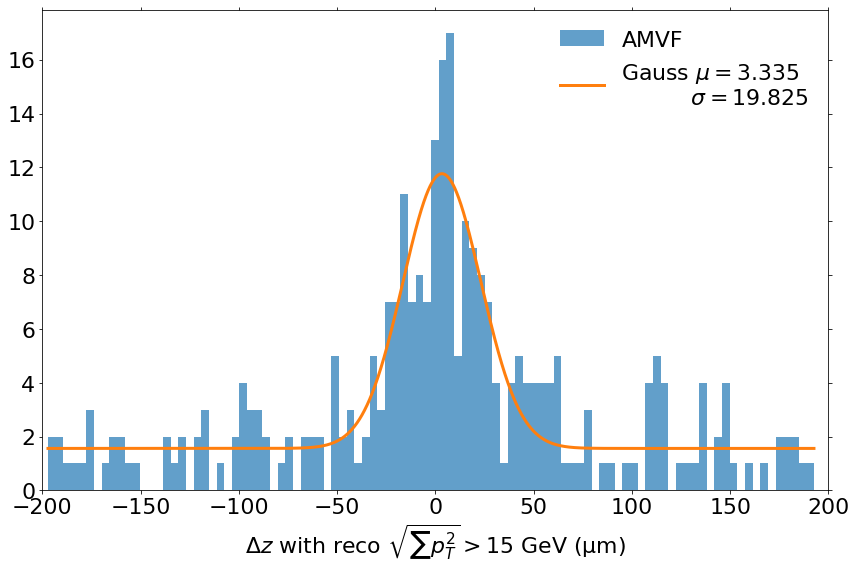

In [55]:
max_delta_z = 200

IVF_idx  = np.abs(1e3*IVF_delta_z) < max_delta_z
AMVF_idx = np.abs(1e3*AMVF_delta_z) < max_delta_z

# IVFbin_heights, IVFbin_borders, _ =   plt.hist(1e3*IVF_delta_z [IVF_idx],  bins=100, alpha=0.7, label='IVF')
AMVFbin_heights, AMVFbin_borders, _ = plt.hist(1e3*AMVF_delta_z[AMVF_idx], bins=100, alpha=0.7, label='AMVF')

# IVFbin_centers = IVFbin_borders[:-1] + np.diff(IVFbin_borders) / 2
# popt1, _ = curve_fit(gaussian, IVFbin_centers, IVFbin_heights, p0=[100, 0., 100, 0])

#Plot fit
# x_interval_for_fit = np.linspace(IVFbin_borders[0], IVFbin_borders[-1], 10000)
# plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt1), lw=3, label='Gauss $\\mu={:.3f}$\n          $\\sigma={:.3f}$'.format(popt1[1], popt1[2]))

AMVFbin_centers = AMVFbin_borders[:-1] + np.diff(AMVFbin_borders) / 2
popt1, _ = curve_fit(gaussian, AMVFbin_centers, AMVFbin_heights, p0=[100, 0., 30, 0])

#Plot fit
x_interval_for_fit = np.linspace(AMVFbin_borders[0], AMVFbin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt1), lw=3, label='Gauss $\\mu={:.3f}$\n          $\\sigma={:.3f}$'.format(popt1[1], popt1[2]))



# plt.text(-max_delta_z+40, 300, "ntuple 144 events\nmaxIter 500", fontsize=22)

plt.xlim(-max_delta_z, max_delta_z)
plt.xlabel('$\\Delta z$ with reco $\\sqrt{\\sum p_T^2} > 15$ GeV (µm)')

plt.legend(frameon=False)

plt.tight_layout()

Text(0.5, 0, 'Delta z for ACTS AMVF reco and ntuple reco vtxs (µm)')

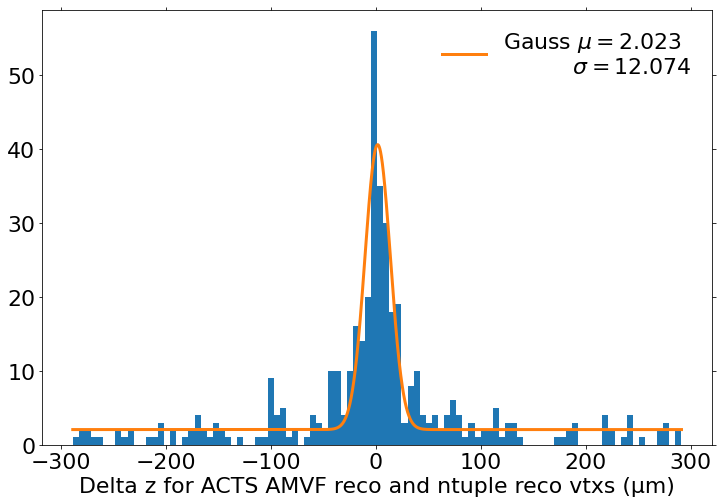

In [56]:
########################################################################
## REMEMBER: there is no sumpt2 cutoff for the ntuple reco vtxs here! ##
########################################################################

idx = np.abs(1e3*AMVF_vs_reco_delta_z) < 300
AMVFbin_heights, AMVFbin_borders, _  = plt.hist(1e3*AMVF_vs_reco_delta_z[idx], bins=100)

AMVFbin_centers = AMVFbin_borders[:-1] + np.diff(AMVFbin_borders) / 2
popt1, _ = curve_fit(gaussian, AMVFbin_centers, AMVFbin_heights, p0=[100, 0., 10, 0])

#Plot fit
x_interval_for_fit = np.linspace(AMVFbin_borders[0], AMVFbin_borders[-1], 10000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt1), lw=3, label='Gauss $\\mu={:.3f}$\n          $\\sigma={:.3f}$'.format(popt1[1], popt1[2]))

plt.legend(frameon=False)
plt.xlabel("Delta z for ACTS AMVF reco and ntuple reco vtxs (µm)")


In [ ]:
AMVF_delta_z = np.array([])
AMVF_vs_reco_delta_z = np.array([])
IVF_delta_z = np.array([])
for amvf_file, ivf_file, amvf_reco_file in zip(AMVF_filenames, IVF_filenames, AMVF_vs_reco_filenames):
    AMVF_delta_z = np.concatenate((AMVF_delta_z, np.loadtxt(amvf_file)))
    IVF_delta_z = np.concatenate((IVF_delta_z, np.loadtxt(ivf_file)))
    AMVF_vs_reco_delta_z = np.concatenate((AMVF_vs_reco_delta_z, np.loadtxt(amvf_reco_file)))